# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('demo01.csv', na_values='NaN', sep=',')
df

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,F,N,Y,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54.109589,9.884932,1,0,0,0,2.0,True
16646,F,N,Y,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.389041,7.380822,1,1,1,0,2.0,True
16647,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True
16648,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True


In [3]:
df.dtypes

sexo                      object
posse_de_veiculo          object
posse_de_imovel           object
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                         bool
dtype: object

In [4]:
df = df.drop_duplicates() # Muitos dados duplicados
df = df.reset_index(drop=True)
df

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
3,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False
4,F,N,Y,0,Working,Secondary / secondary special,Married,House / apartment,27.482192,4.024658,1,0,1,0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,F,N,Y,1,Working,Secondary / secondary special,Single / not married,House / apartment,34.857534,3.101370,1,1,1,0,1.0,True
6766,F,N,Y,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54.109589,9.884932,1,0,0,0,2.0,True
6767,F,N,Y,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.389041,7.380822,1,1,1,0,2.0,True
6768,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True


In [5]:
df.isna().sum() # Sem dados ausentes

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

In [6]:
# Identificando o perfil das variáveis
for col in df: 
    print(df[col].value_counts())
    print('')

# Tratar colunas binárias: ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'mau']
# Discretizar colunas p/ dummies: ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia']

sexo
F    4449
M    2321
Name: count, dtype: int64

posse_de_veiculo
N    4211
Y    2559
Name: count, dtype: int64

posse_de_imovel
Y    4493
N    2277
Name: count, dtype: int64

qtd_filhos
0     4725
1     1330
2      609
3       90
4       12
5        2
14       1
7        1
Name: count, dtype: int64

tipo_renda
Working                 3449
Commercial associate    1587
Pensioner               1191
State servant            542
Student                    1
Name: count, dtype: int64

educacao
Secondary / secondary special    4695
Higher education                 1743
Incomplete higher                 249
Lower secondary                    78
Academic degree                     5
Name: count, dtype: int64

estado_civil
Married                 4654
Single / not married     862
Civil marriage           551
Separated                399
Widow                    304
Name: count, dtype: int64

tipo_residencia
House / apartment      6078
With parents            289
Municipal apartment     233
R

In [7]:
# Tratamento de Colunas binárias
df.sexo = df['sexo'].map({'F': 0, 'M': 1})
df.posse_de_veiculo = df['posse_de_veiculo'].map({'N': 0, 'Y': 1})
df.posse_de_imovel = df['posse_de_imovel'].map({'N': 0, 'Y': 1})
df.mau = df.mau.astype(int)

print(df[['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'mau']].head())

   sexo  posse_de_veiculo  posse_de_imovel  mau
0     1                 1                1    0
1     0                 0                1    0
2     1                 1                1    0
3     0                 1                0    0
4     0                 0                1    0


qtd_filhos
0     4725
1     1330
2      609
3       90
4       12
5        2
14       1
7        1
Name: count, dtype: int64


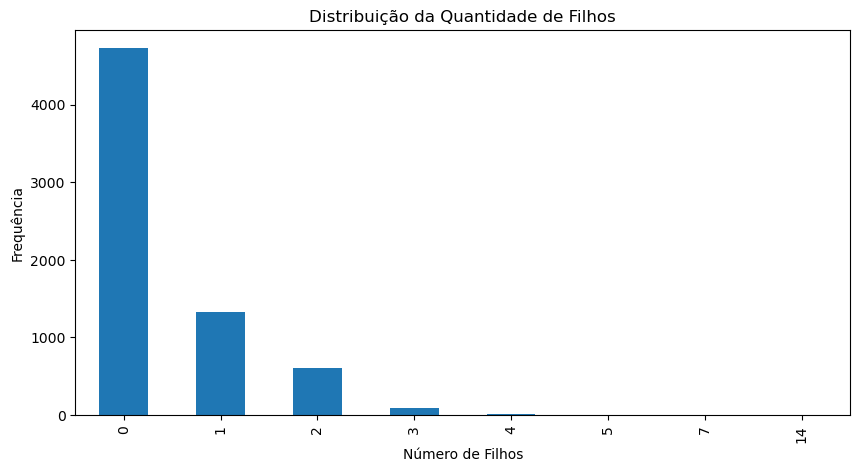

In [8]:
# Verificando primeira variável a ser categorizada
print(df.qtd_filhos.value_counts())

df['qtd_filhos'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.xlabel("Número de Filhos")
plt.ylabel("Frequência")
plt.title("Distribuição da Quantidade de Filhos")
plt.show()

In [9]:
# Catergoriazando variável
bins=[0, 1, 2, 3, 19]
labels=['0', '1', '2', '3+']
df.qtd_filhos = pd.cut(df.qtd_filhos, bins=bins, labels=labels, include_lowest=True)
df.qtd_filhos.value_counts()

qtd_filhos
0     6055
1      609
2       90
3+      16
Name: count, dtype: int64

In [10]:
# Verificando segunda variável a ser categorizada
print(df.idade.value_counts())
print('')
print(df.idade.describe())

idade
58.528767    6
40.893151    5
38.690411    5
46.290411    5
56.682192    5
            ..
45.263014    1
56.701370    1
25.723288    1
60.687671    1
43.389041    1
Name: count, Length: 5298, dtype: int64

count    6770.000000
mean       44.323693
std        11.356149
min        22.030137
25%        34.728767
50%        43.524658
75%        53.800000
max        68.909589
Name: idade, dtype: float64


In [11]:
# Categorizando segunda variável
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

df['idade'] = pd.cut(df['idade'], bins=bins, labels=labels)

print(df['idade'].value_counts())

idade
35-44    1919
25-34    1658
45-54    1640
55-64    1318
65+       150
18-24      85
Name: count, dtype: int64


In [12]:
# Verificando terceira variável a ser categorizada
print(df.tempo_emprego.value_counts()) # -1000.665753 provavelmente sendo um código para desempregado ou nunca trabalhou
print('')
print(df.tempo_emprego.describe())

tempo_emprego
-1000.665753    1184
 4.216438         12
 0.547945         12
 0.295890         11
 1.098630         11
                ... 
 32.619178         1
 15.109589         1
 14.024658         1
 13.109589         1
 30.882192         1
Name: count, Length: 3005, dtype: int64

count    6770.000000
mean     -168.927670
std       382.998181
min     -1000.665753
25%         1.032877
50%         4.289041
75%         8.695890
max        42.906849
Name: tempo_emprego, dtype: float64


In [13]:
# Tratamento prévio para categorização
df['status_emprego'] = np.where(np.isclose(df['tempo_emprego'], -1000.665753), 0, 1) # Nova variável para status de desempregado

df['replace_tempo_emprego'] = df['tempo_emprego']
df.loc[np.isclose(df['tempo_emprego'], -1000.665753), 'replace_tempo_emprego'] = 0 # Substituindo código -1000.665753 por 0 dias trabalhados

print(df.replace_tempo_emprego.value_counts())
print('')
print(df.replace_tempo_emprego.describe())

replace_tempo_emprego
0.000000     1184
4.216438       12
0.547945       12
0.295890       11
1.098630       11
             ... 
32.619178       1
15.109589       1
14.024658       1
13.109589       1
30.882192       1
Name: count, Length: 3005, dtype: int64

count    6770.000000
mean        6.077980
std         6.587935
min         0.000000
25%         1.032877
50%         4.289041
75%         8.695890
max        42.906849
Name: replace_tempo_emprego, dtype: float64


In [14]:
# Categorizando terceira variável
bins = [0, 1, 3, 5, 10, 20, 30, df['replace_tempo_emprego'].max()]  # Faixas de experiência profissional
labels = ['<1 ano', '1-3 anos', '3-5 anos', '5-10 anos', '10-20 anos', '20-30 anos', '30+ anos']

df['tempo_emprego'] = pd.cut(df['replace_tempo_emprego'], bins=bins, labels=labels)

print(df['tempo_emprego'].value_counts())

tempo_emprego
5-10 anos     1654
3-5 anos      1050
1-3 anos      1037
10-20 anos    1028
<1 ano         488
20-30 anos     262
30+ anos        67
Name: count, dtype: int64


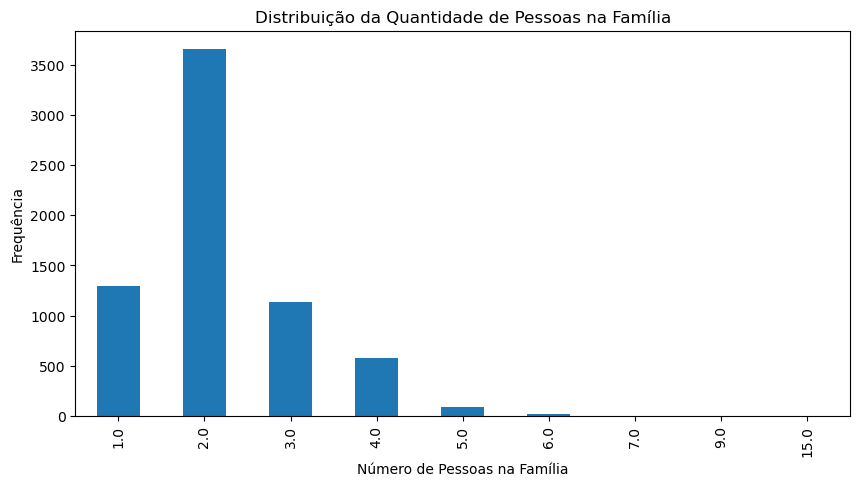

In [15]:
# Verificando quarta variável a ser categorizada
df.qt_pessoas_residencia.value_counts()

df['qt_pessoas_residencia'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.xlabel("Número de Pessoas na Família")
plt.ylabel("Frequência")
plt.title("Distribuição da Quantidade de Pessoas na Família")
plt.show()

In [16]:
# Categorizando quinta variável
bins=[0, 1, 2, 3, 4, 20]
labels=['1', '2', '3', '4', '5+']
df.qt_pessoas_residencia = pd.cut(df.qt_pessoas_residencia, bins=bins, labels=labels, include_lowest=True)

print(df.qt_pessoas_residencia.value_counts())

qt_pessoas_residencia
2     3660
1     1292
3     1140
4      576
5+     102
Name: count, dtype: int64


In [17]:
# Identificando o perfil das variáveis atualizadas
for col in df: 
    print(df[col].value_counts())
    print('')

# Dropar colunas: ['replace_tempo_emprego']
# Criar dummies: ['qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia']

sexo
0    4449
1    2321
Name: count, dtype: int64

posse_de_veiculo
0    4211
1    2559
Name: count, dtype: int64

posse_de_imovel
1    4493
0    2277
Name: count, dtype: int64

qtd_filhos
0     6055
1      609
2       90
3+      16
Name: count, dtype: int64

tipo_renda
Working                 3449
Commercial associate    1587
Pensioner               1191
State servant            542
Student                    1
Name: count, dtype: int64

educacao
Secondary / secondary special    4695
Higher education                 1743
Incomplete higher                 249
Lower secondary                    78
Academic degree                     5
Name: count, dtype: int64

estado_civil
Married                 4654
Single / not married     862
Civil marriage           551
Separated                399
Widow                    304
Name: count, dtype: int64

tipo_residencia
House / apartment      6078
With parents            289
Municipal apartment     233
Rented apartment         89
Office apartment 

In [18]:
# Variáveis prontas para criação de dummies
df.drop(columns='replace_tempo_emprego', inplace=True)
df.dtypes

sexo                        int64
posse_de_veiculo            int64
posse_de_imovel             int64
qtd_filhos               category
tipo_renda                 object
educacao                   object
estado_civil               object
tipo_residencia            object
idade                    category
tempo_emprego            category
possui_celular              int64
possui_fone_comercial       int64
possui_fone                 int64
possui_email                int64
qt_pessoas_residencia    category
mau                         int32
status_emprego              int32
dtype: object

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável.
    Dica:
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis,
        3. conte o número de categorias dessa variável
        4. acumule essa informação de 3. na lista que você criou em 1.
        5. No final, essa lista pode ser atribuída à nossa variável.

In [19]:
metadados = pd.DataFrame(df.dtypes, columns=['tipo_variavel'])
metadados

,tipo_variavel
sexo,int64
posse_de_veiculo,int64
posse_de_imovel,int64
qtd_filhos,category
tipo_renda,object
educacao,object
estado_civil,object
tipo_residencia,object
idade,category
tempo_emprego,category


In [20]:
cnt_categorias = []
for var in df.dtypes.index:
    cnt_categorias.append(len(df[var].value_counts()))

metadados['qtd_categorias'] = cnt_categorias
metadados

,tipo_variavel,qtd_categorias
sexo,int64,2
posse_de_veiculo,int64,2
posse_de_imovel,int64,2
qtd_filhos,category,4
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,category,6
tempo_emprego,category,7


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [21]:
df_encoded = pd.get_dummies(df, columns=['qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia'], drop_first=True, dtype=int)
df_encoded.head()

,sexo,posse_de_veiculo,posse_de_imovel,possui_celular,possui_fone_comercial,possui_fone,possui_email,mau,status_emprego,qtd_filhos_1,...,tempo_emprego_1-3 anos,tempo_emprego_3-5 anos,tempo_emprego_5-10 anos,tempo_emprego_10-20 anos,tempo_emprego_20-30 anos,tempo_emprego_30+ anos,qt_pessoas_residencia_2,qt_pessoas_residencia_3,qt_pessoas_residencia_4,qt_pessoas_residencia_5+
0,1,1,1,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,1,1,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,0,1,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,1,1,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0


#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [22]:
pd.crosstab(df.possui_email, df.posse_de_veiculo) # Posse de veículo possui uma contagem maior aparentando ser uma variável promissora para a nossa previsão

posse_de_veiculo,0,1
possui_email,,
0,3878,2327
1,333,232


#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [23]:
df_encoded.to_csv('treated_demo01.csv', sep=',', index=False)

In [24]:
metadados.to_csv('metadados_demo01_.csv', sep=',', index=False)